In [6]:
import sys
sys.path.append("./simulation/")

#from util import *
import os, shutil
import pandas as pd
from datetime import datetime


from elecpy.elecpySession import ElecpySession

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.path as mpath
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import art3d
from matplotlib import cm
import copy

%matplotlib inline


In [7]:
from opmap.videoData import VideoData
from opmap.vmemMap import VmemMap
from opmap.phaseMap import PhaseMap


In [25]:
src_dir = '/mnt/Omer/Project/01.PhaseDiscontinuity/SimulationResults/'
save_dir = '/mnt/Omer/Project/01.PhaseDiscontinuity/AnalysisResults/2019-06-05/'
print(save_dir)
if not os.path.exists(save_dir) : os.mkdir(save_dir)

/mnt/Omer/Project/01.PhaseDiscontinuity/AnalysisResults/2019-06-05/


In [9]:

def analyzeSession(sess, save_dir=None):
    
    vmem = VideoData(*sess.data['vmem'].shape)
    vmem.data = sess.data['vmem']
    vmem.cmap = bipolar(neutral=0, lutsize=1024)
    vmem.vmin = sess.data['vmem'].min()
    vmem.vmax = sess.data['vmem'].max()
    
    p_hilbert = PhaseMapHilbert(vmem, width = vmem.data.shape[2], sigma_xy=1, sigma_t=1)
    sess.data['p_hilbert'] = p_hilbert.data    

In [10]:
sess = ElecpySession(os.path.join(src_dir, '20180625-1'))
sess.setRange(
    x_min = 110,
    x_max = 150,
    y_min = 80,
    y_max = 120
)
analyzeSession(sess)

In [11]:
P = sess.data['p_hilbert']
P.shape

(501, 40, 40)

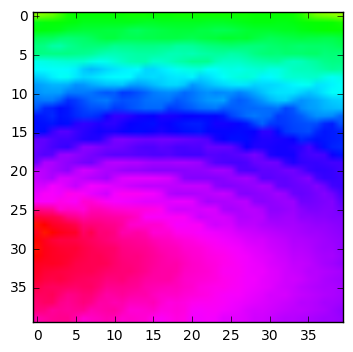

In [13]:
plt.imshow(P[120,:,:], cmap='hsv')

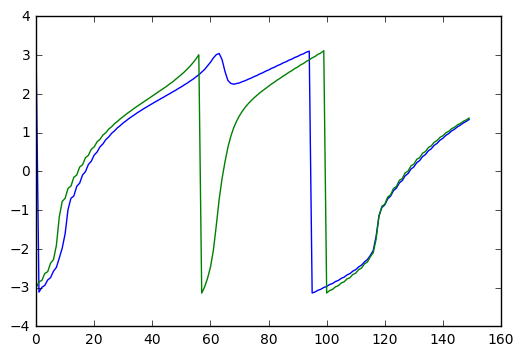

In [20]:
P1 = P[75:225, 106-80, 132-110]
P2 = P[75:225, 109-80, 132-110]
plt.plot(P1)
plt.plot(P2)

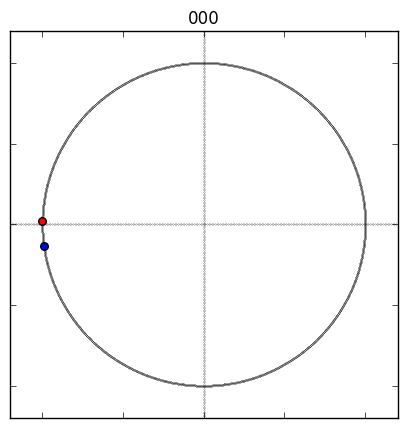

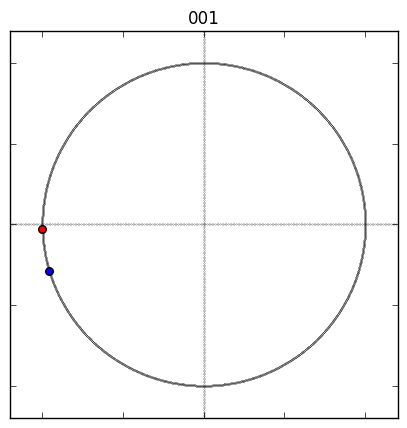

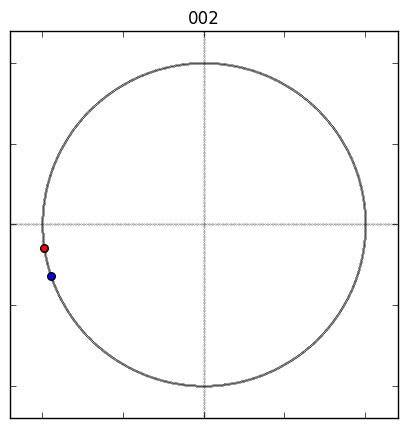

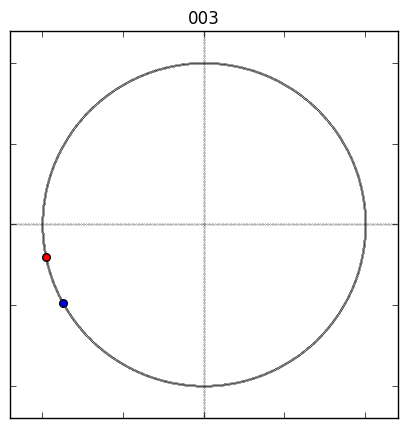

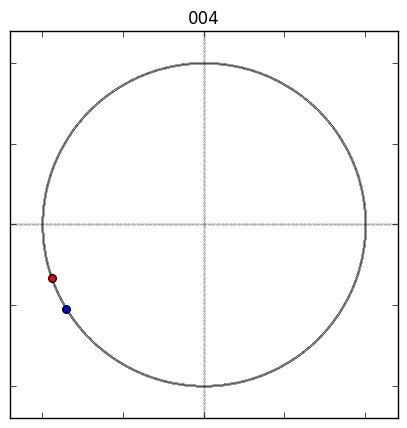

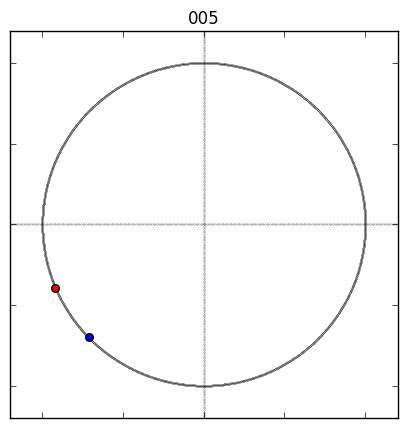

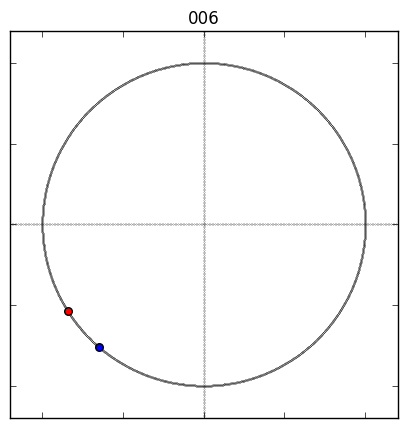

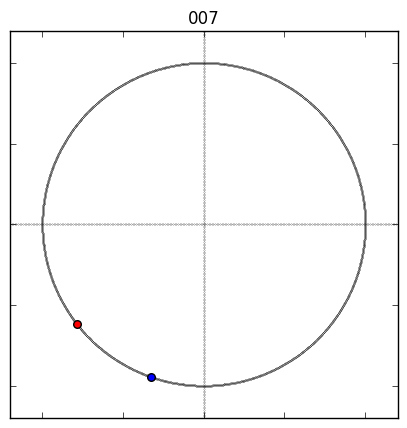

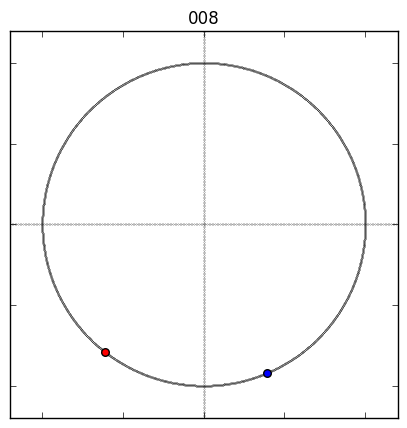

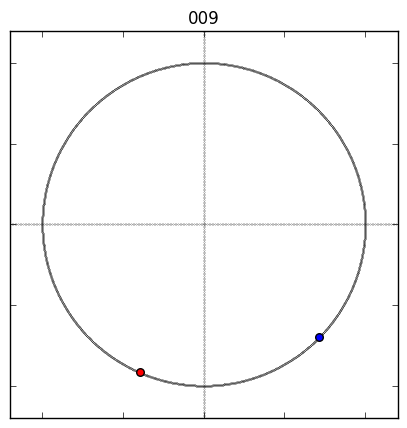

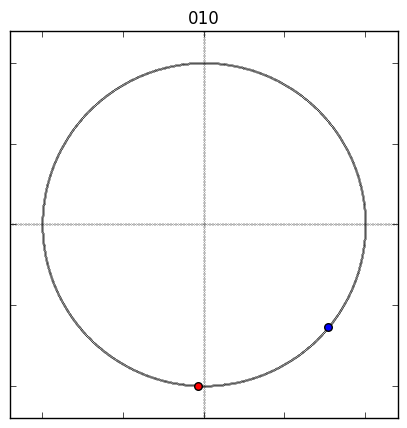

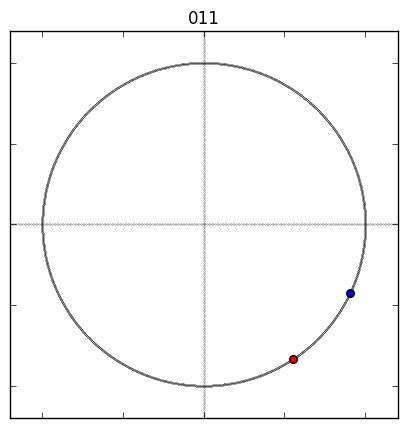

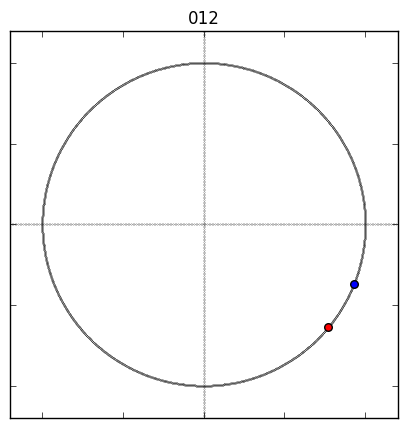

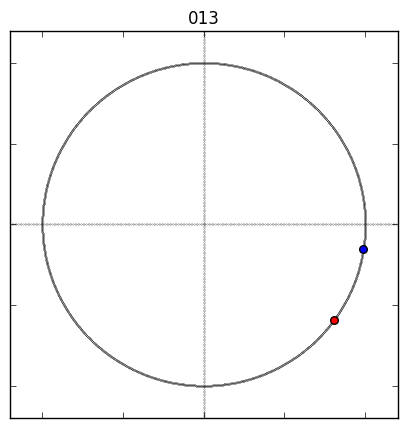

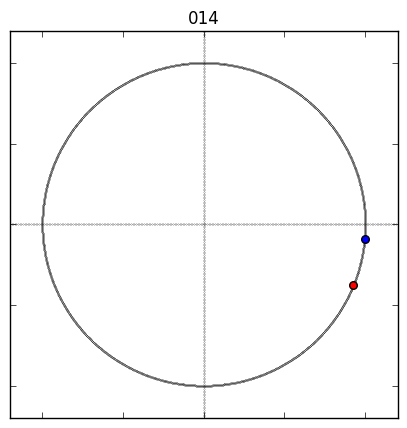

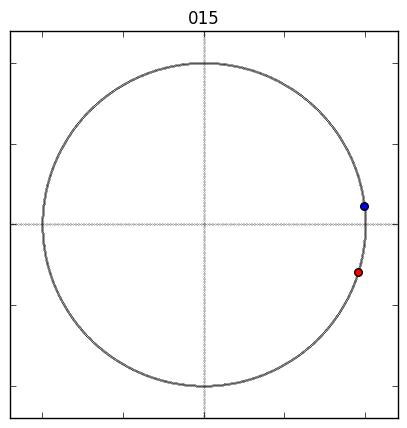

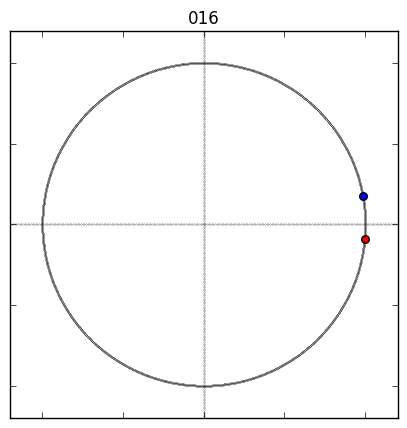

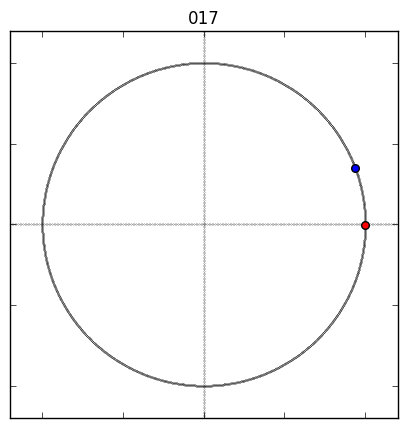

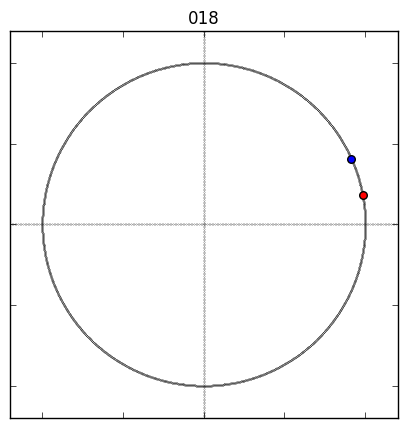

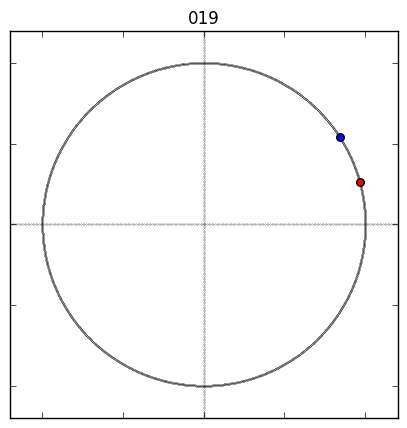

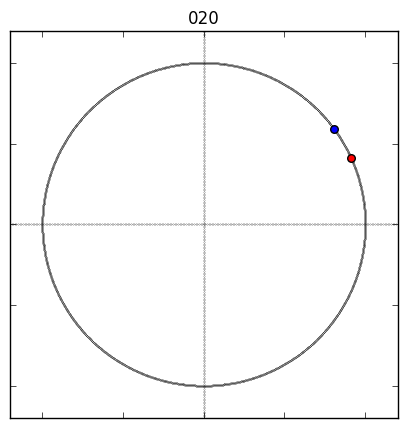

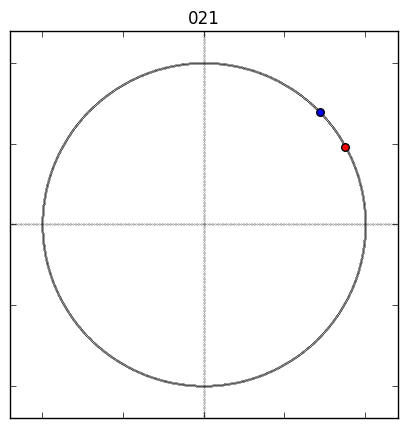

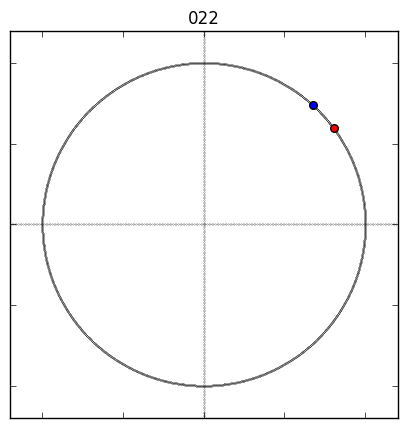

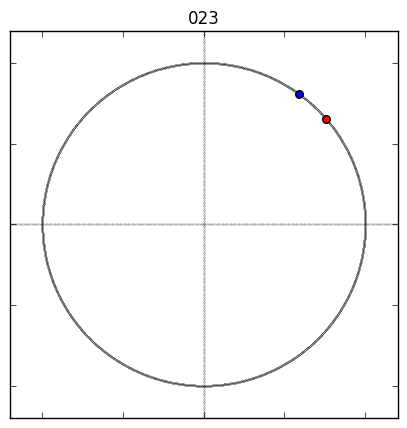

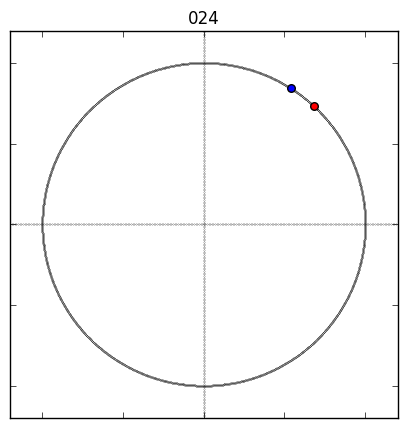

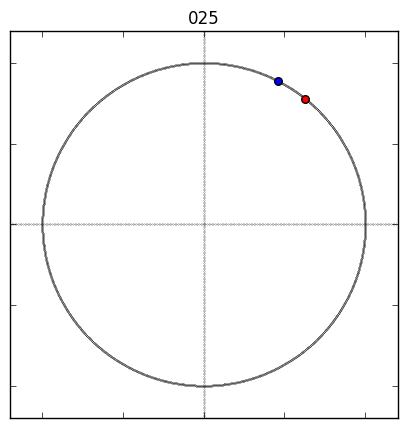

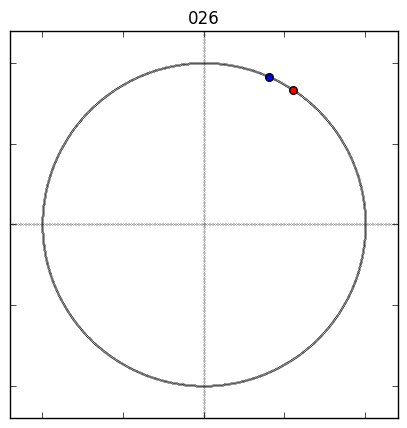

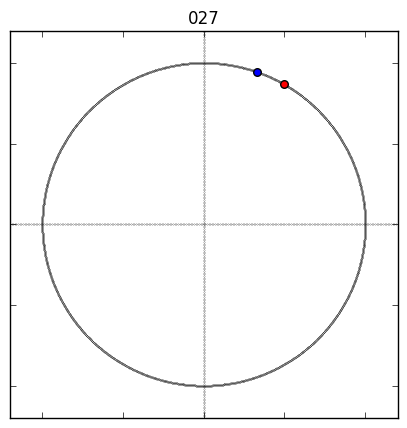

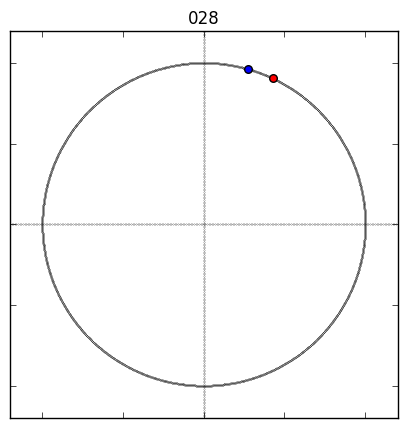

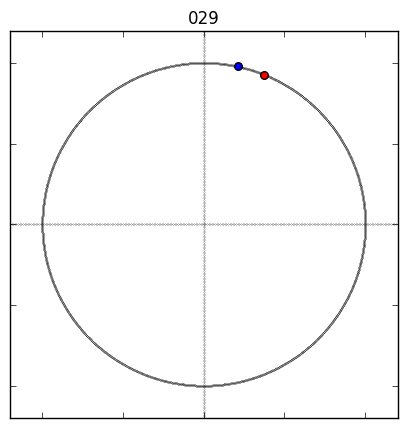

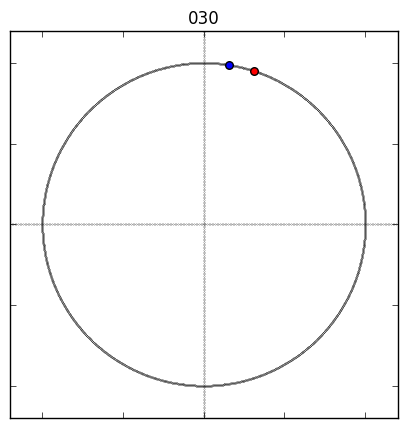

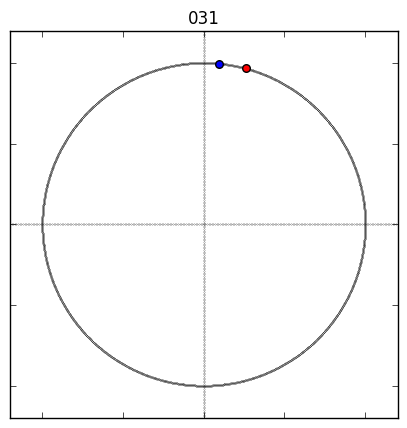

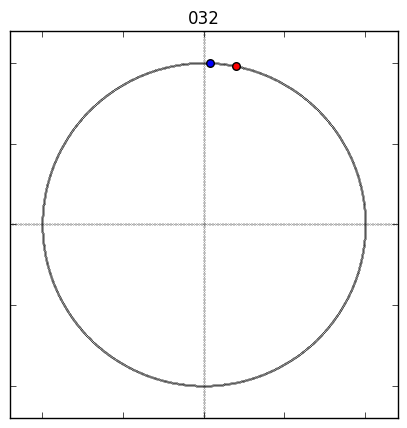

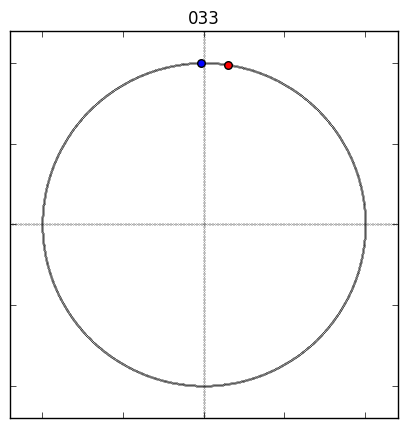

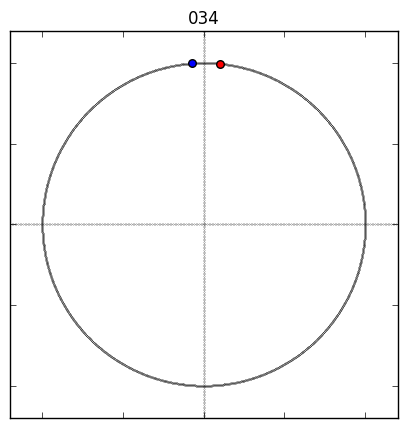

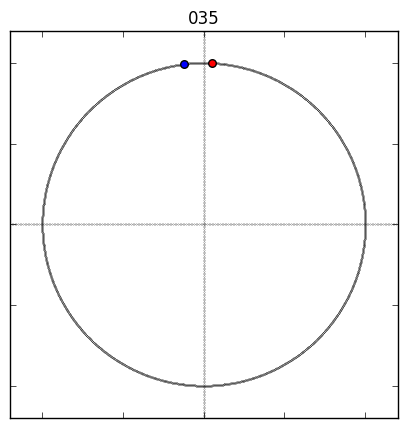

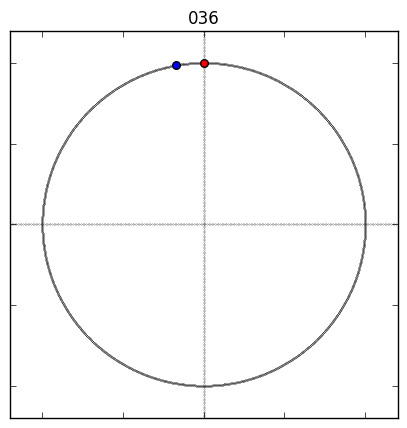

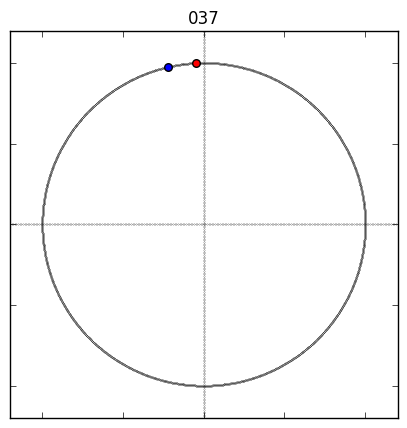

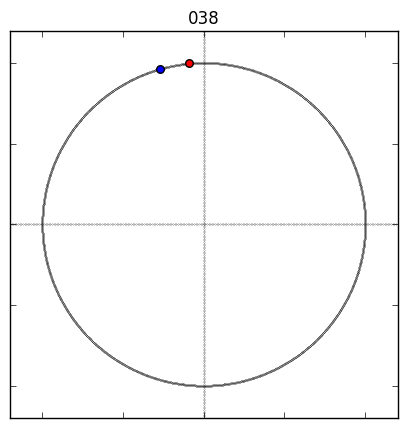

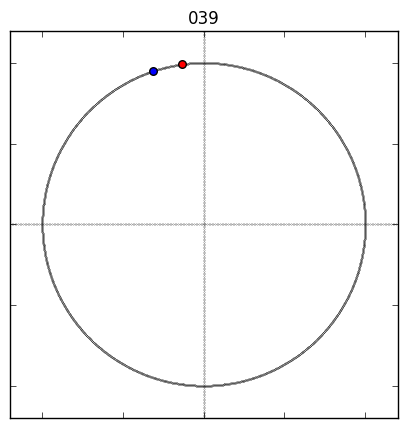

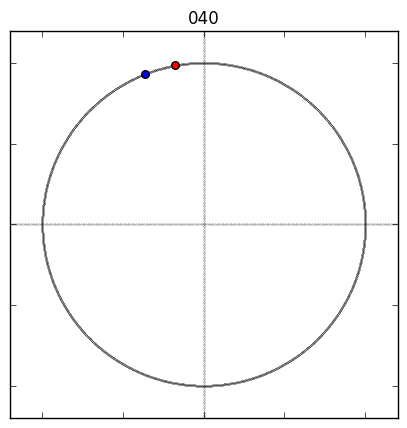

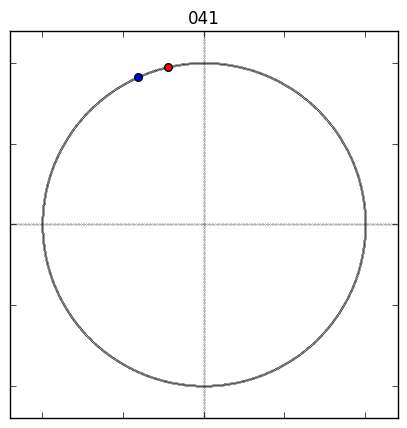

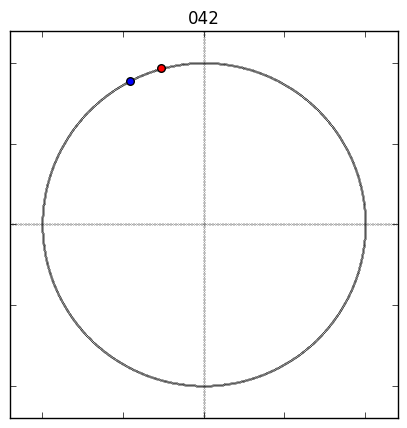

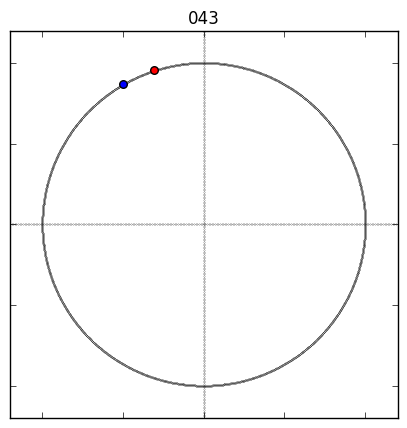

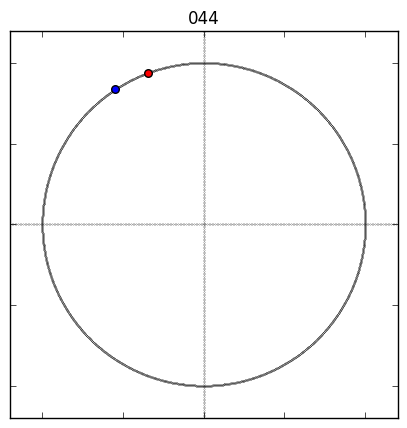

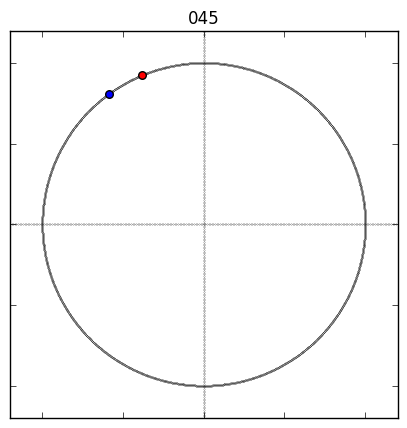

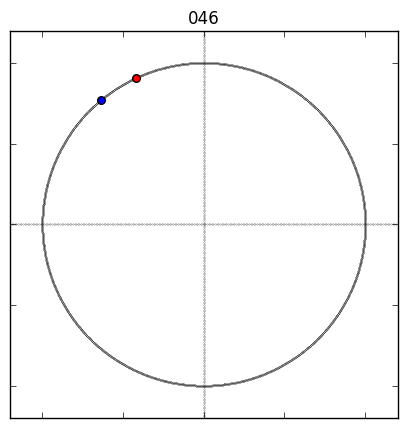

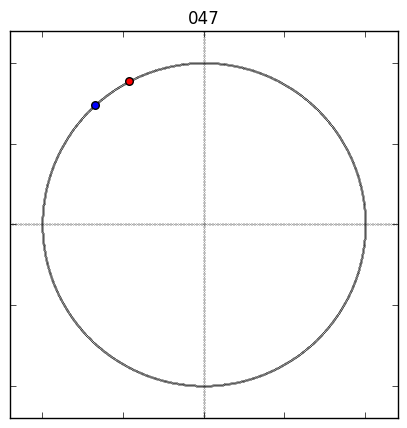

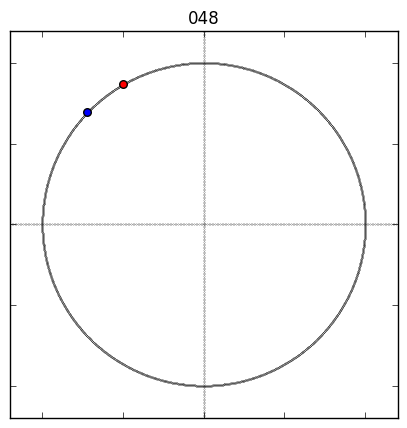

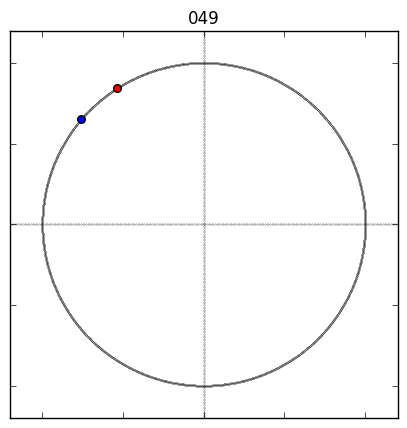

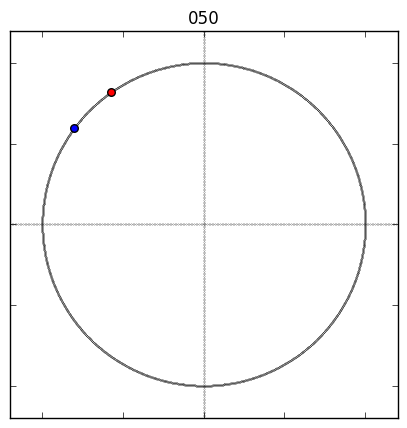

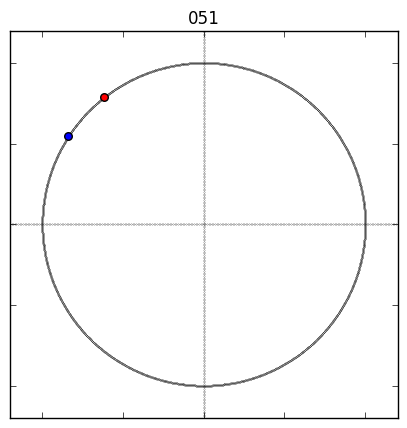

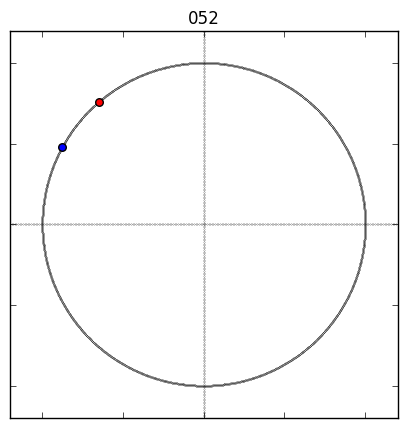

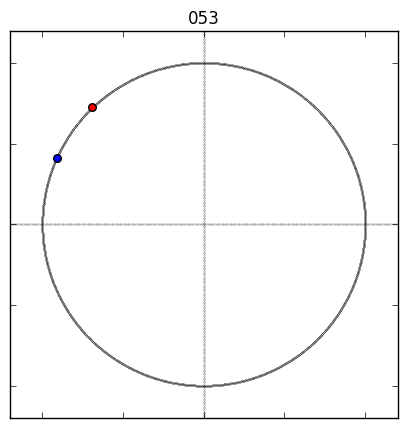

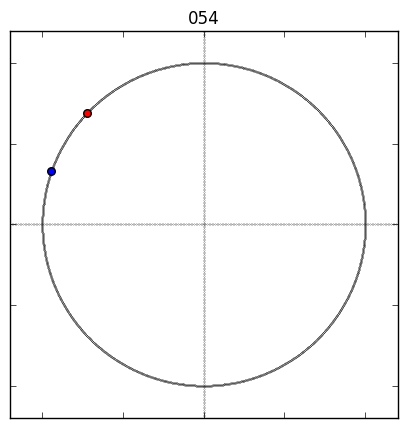

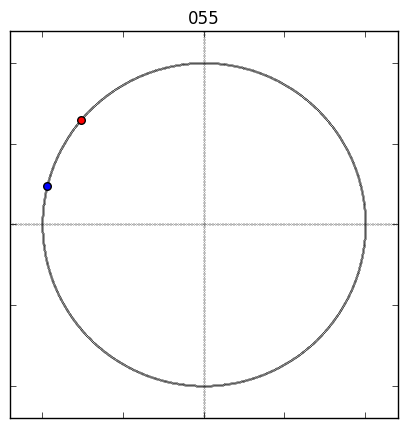

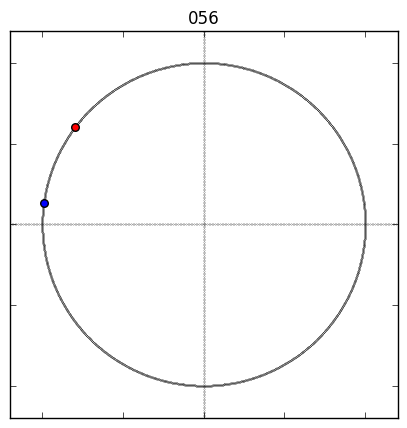

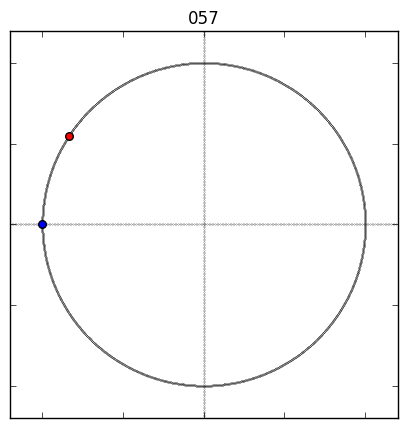

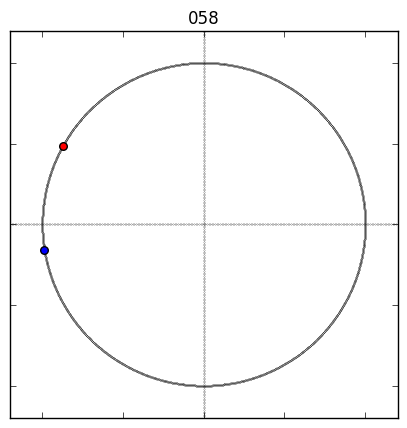

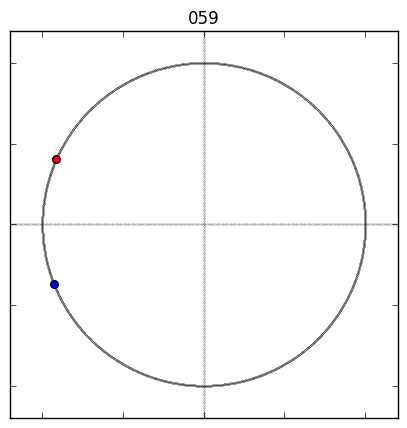

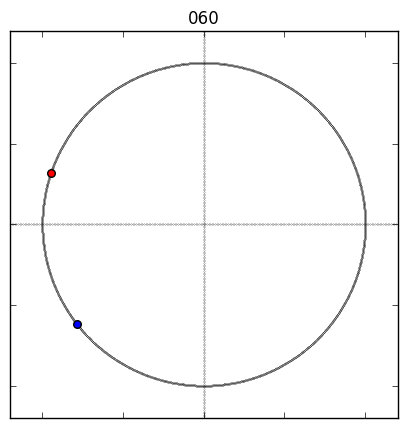

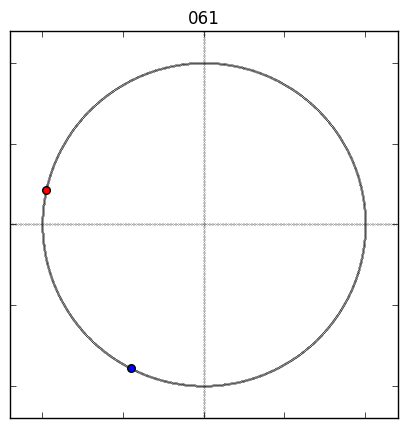

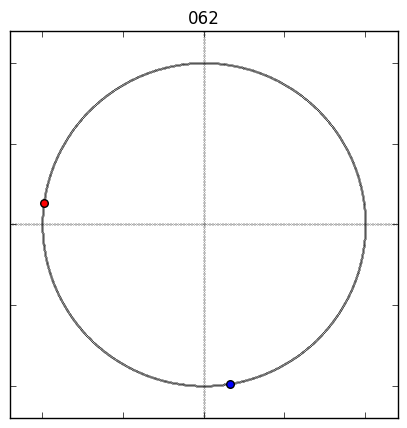

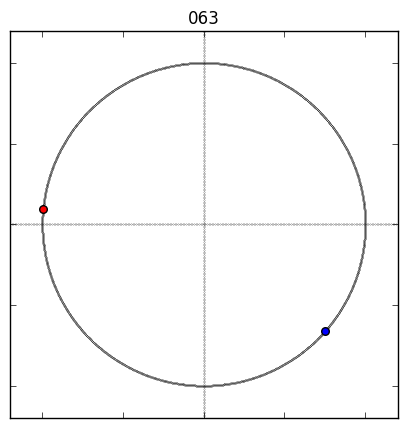

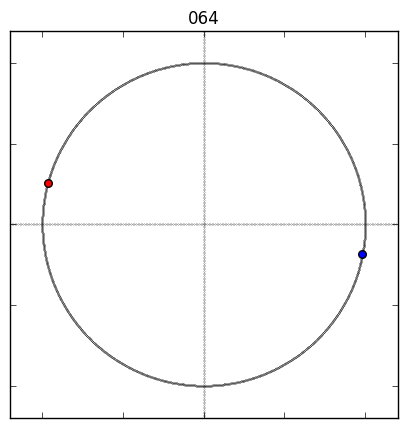

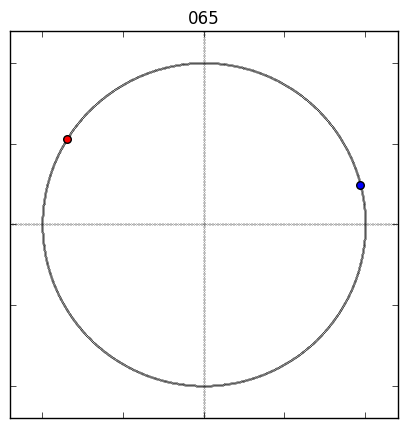

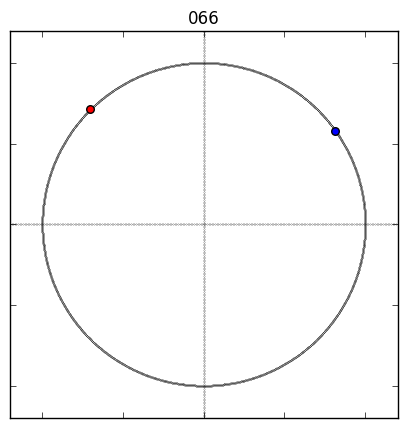

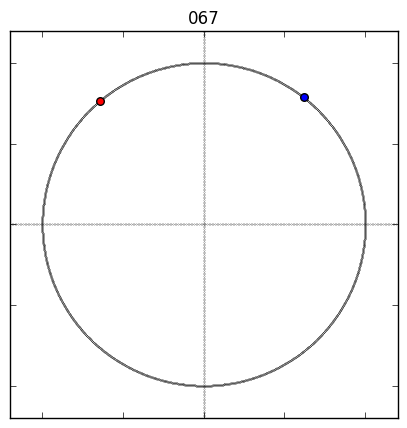

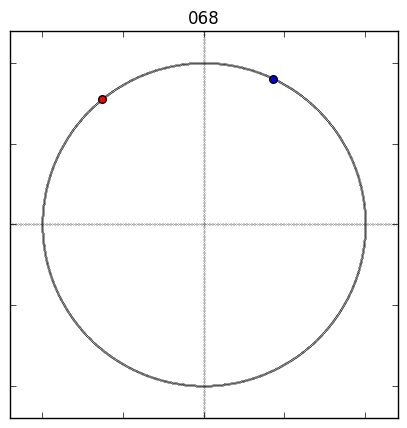

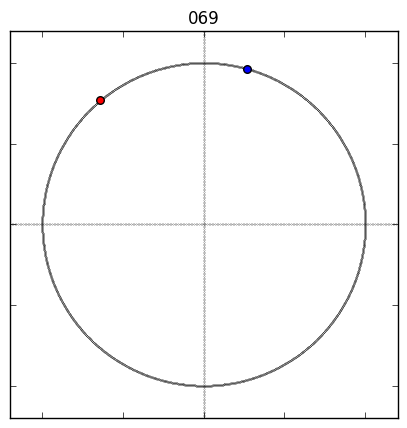

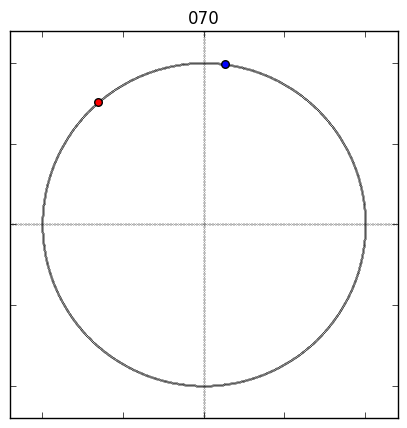

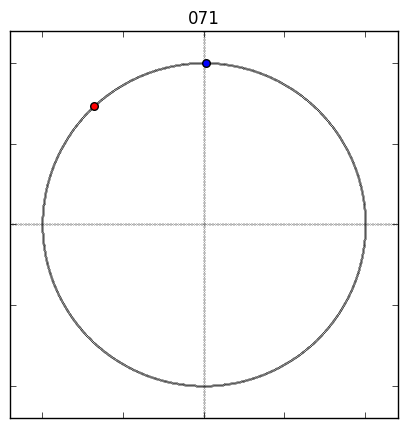

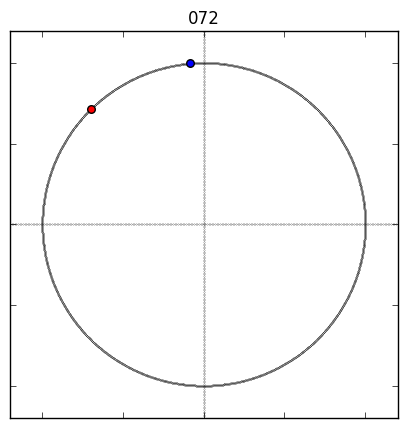

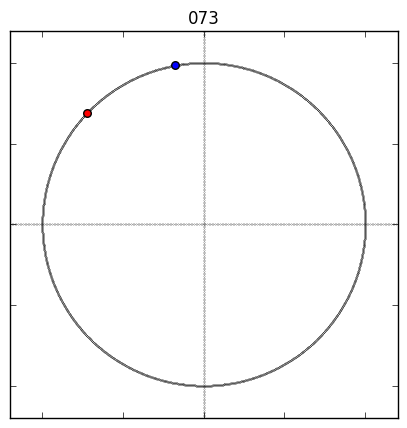

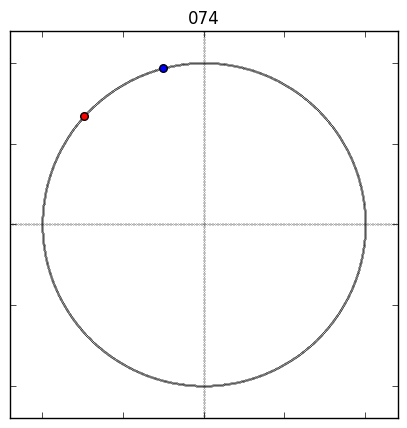

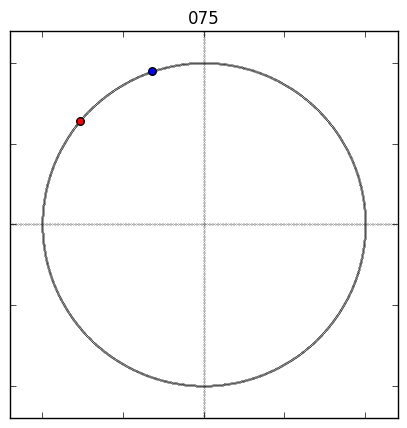

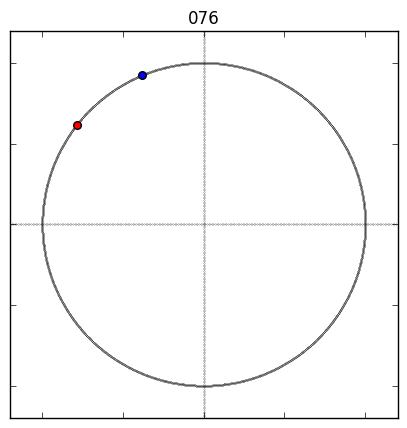

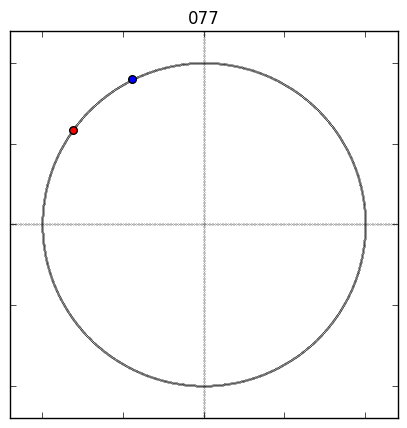

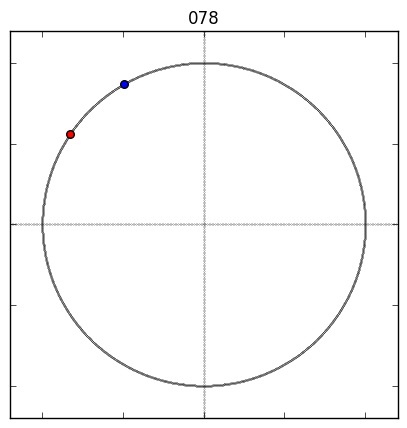

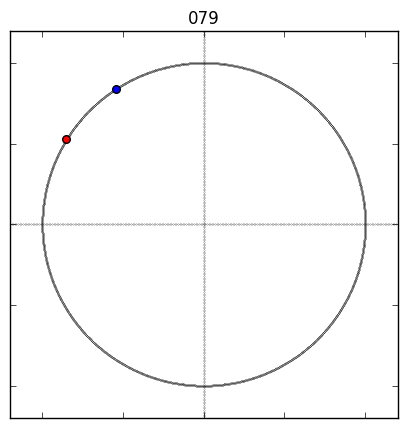

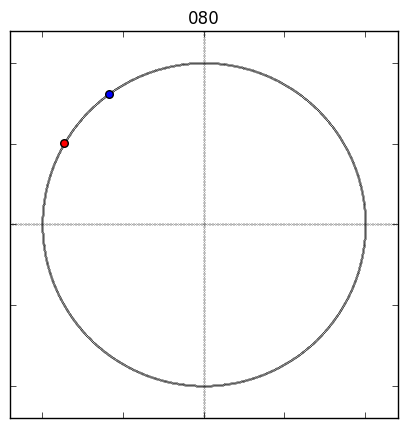

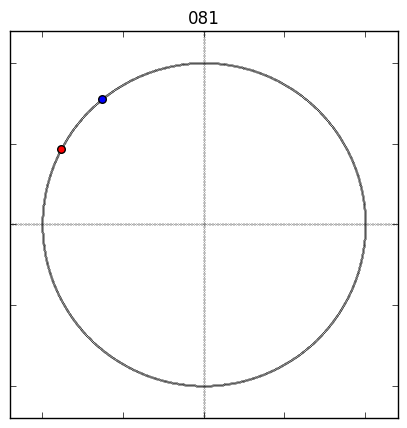

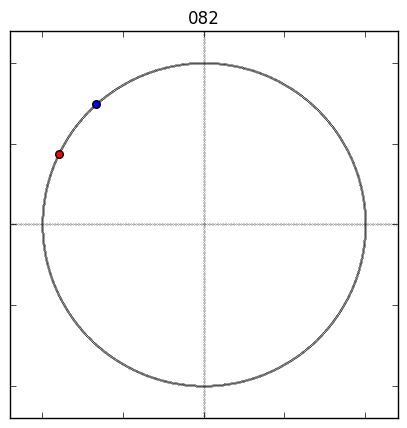

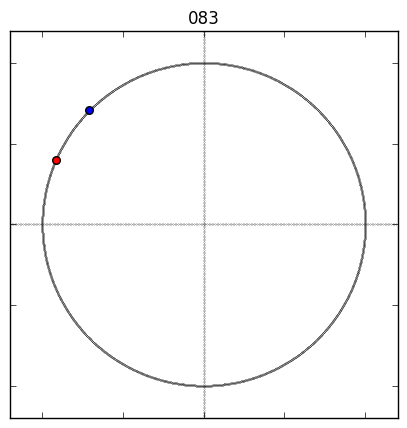

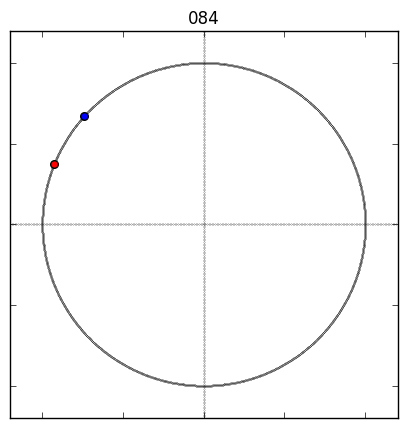

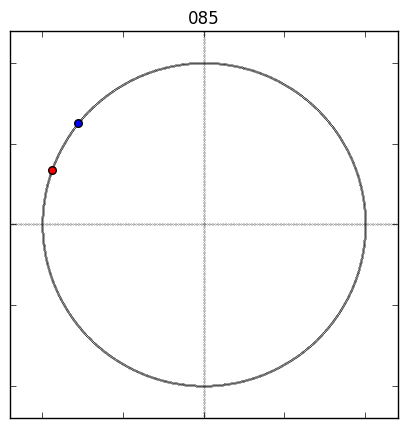

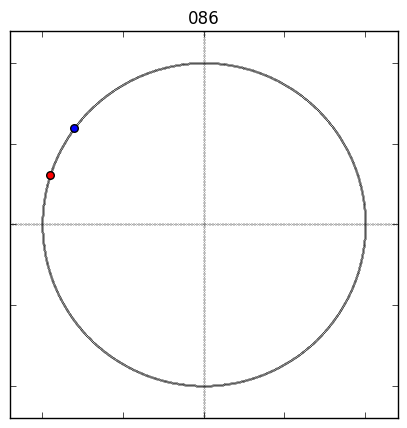

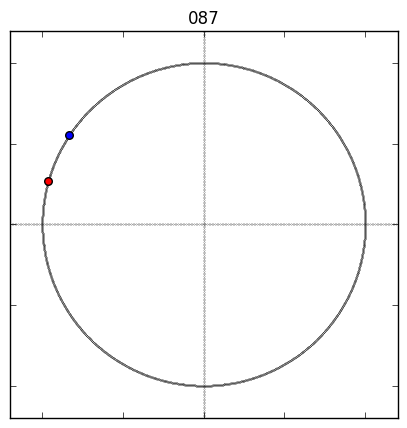

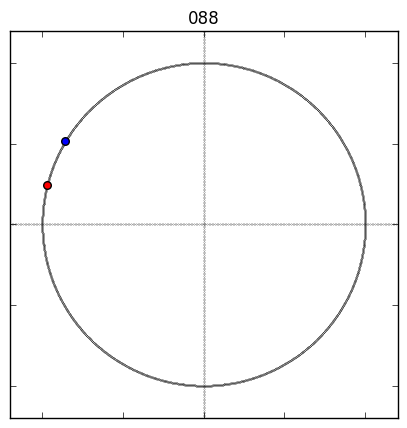

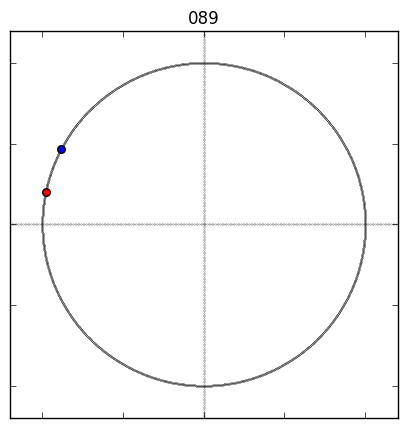

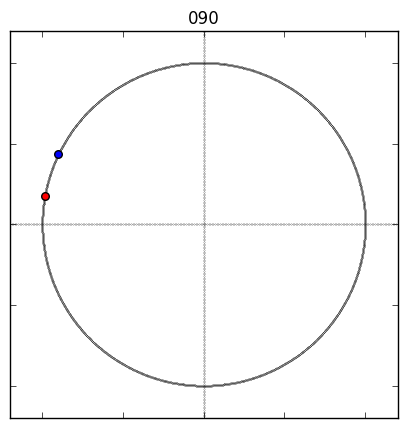

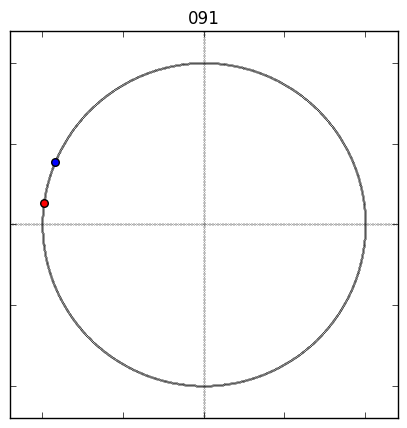

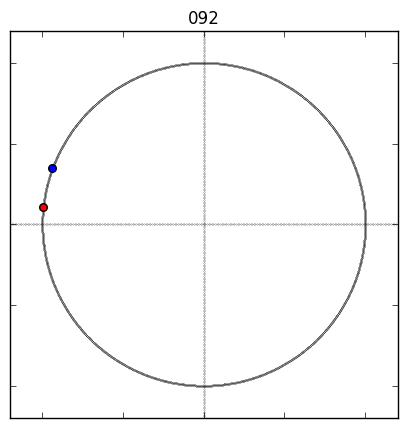

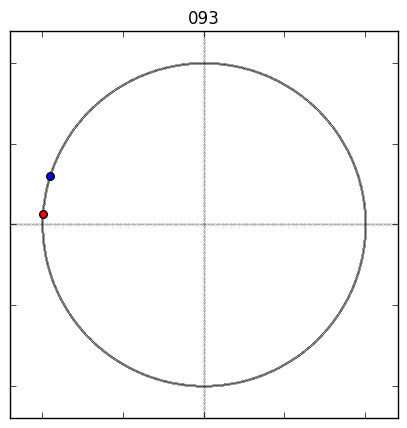

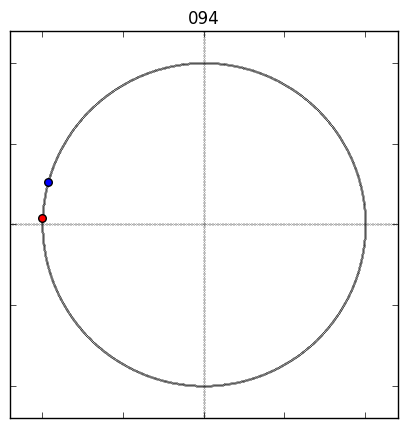

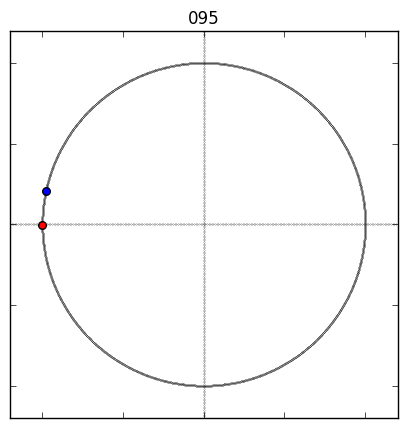

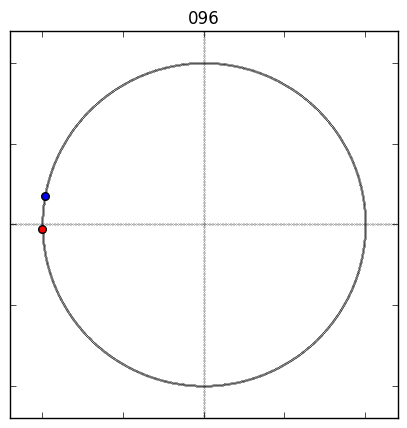

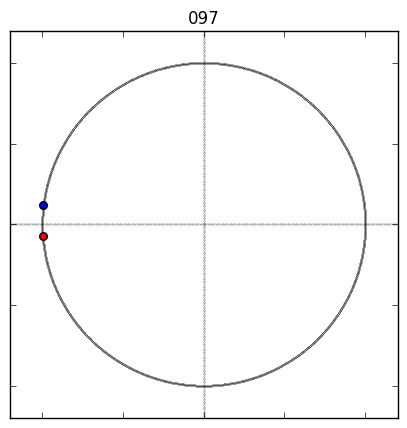

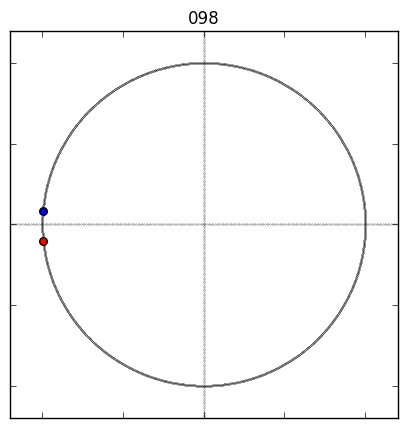

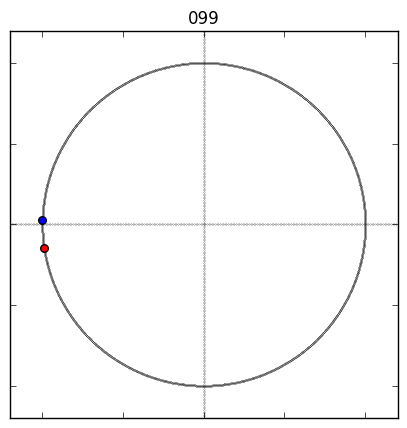

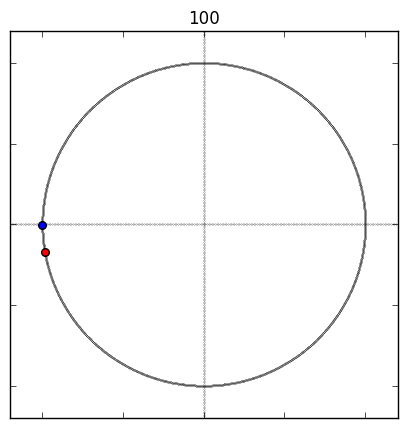

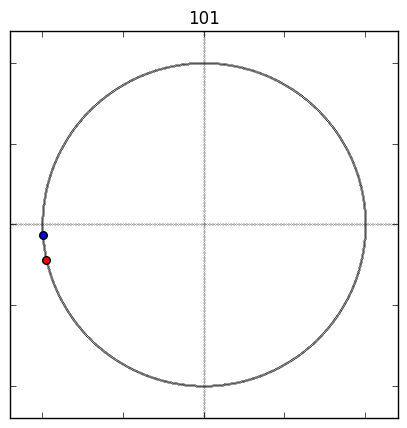

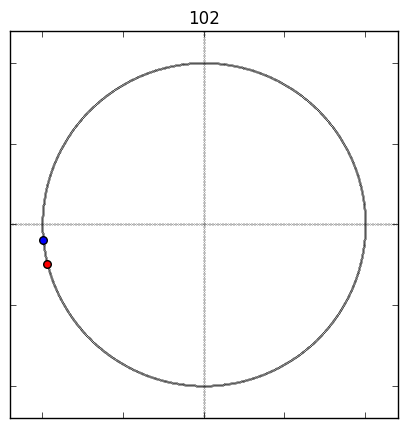

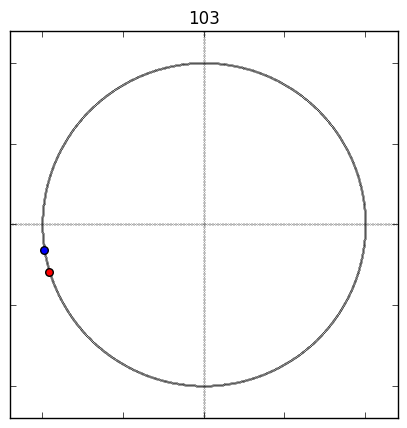

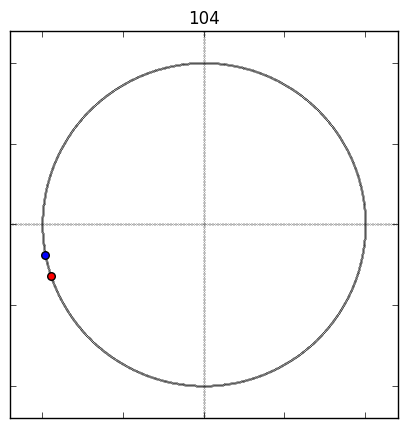

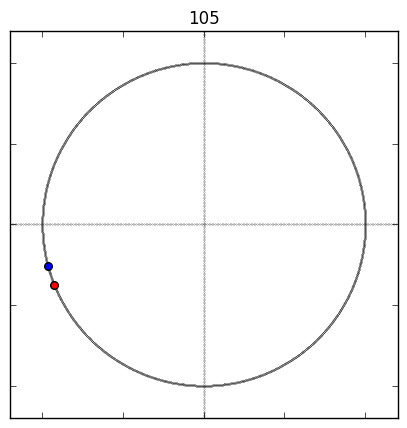

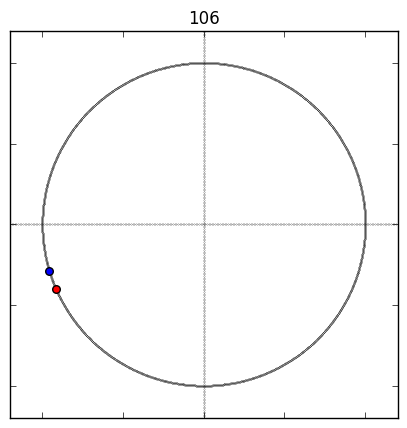

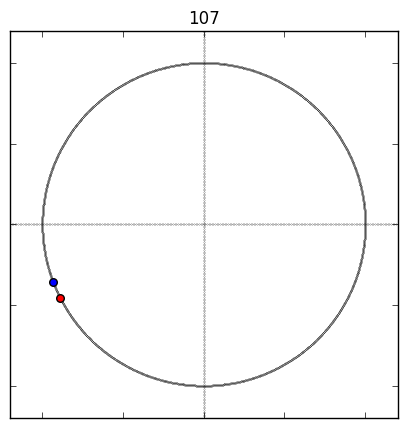

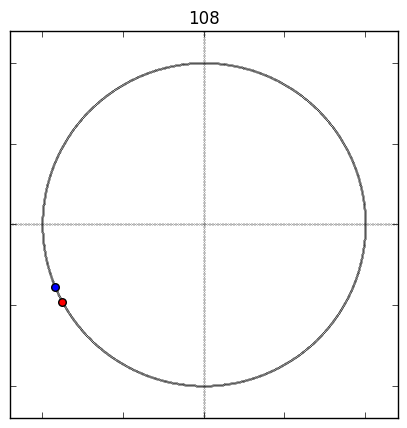

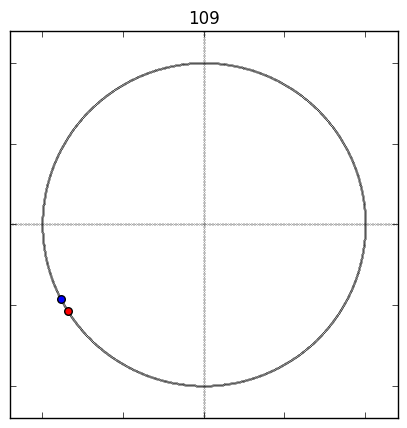

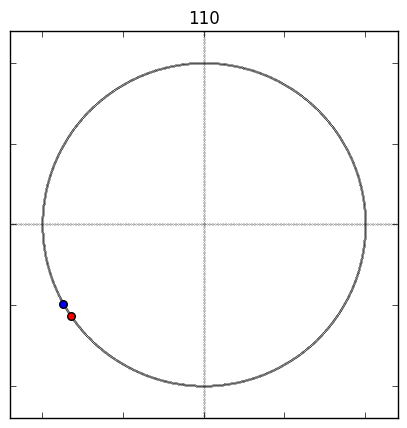

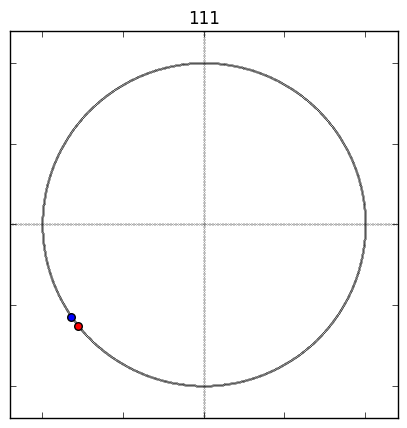

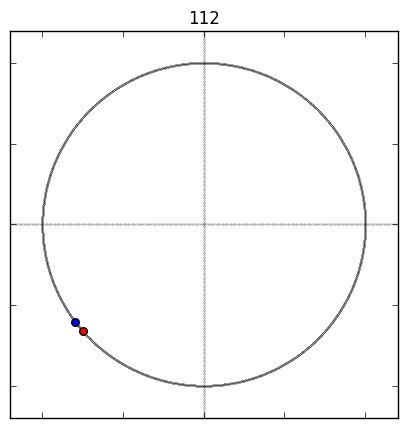

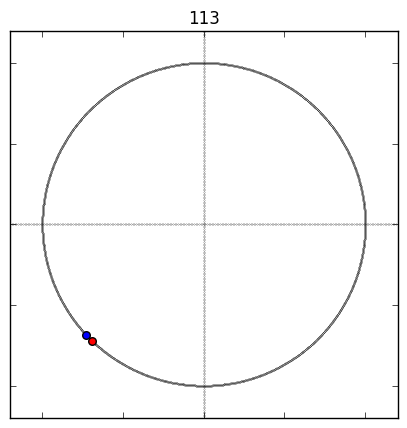

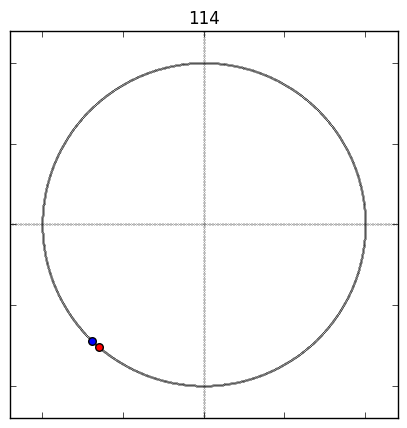

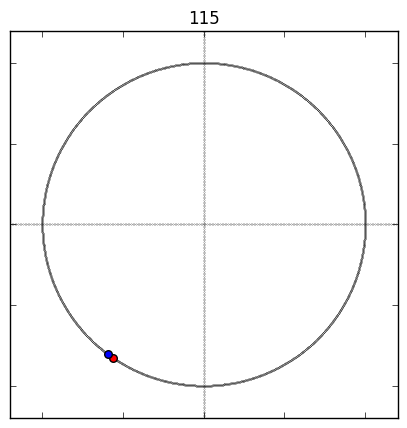

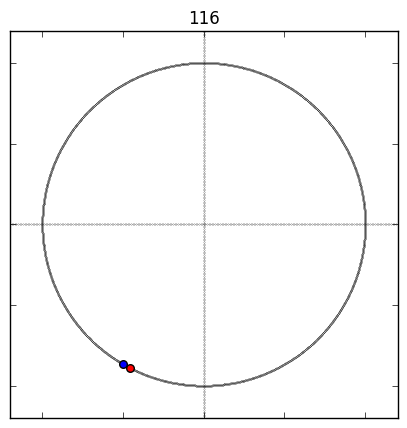

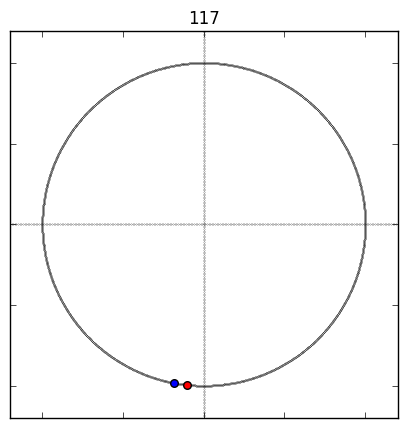

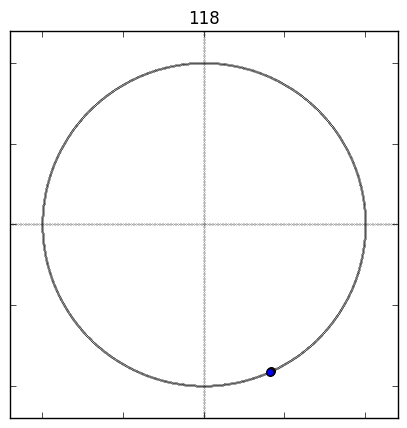

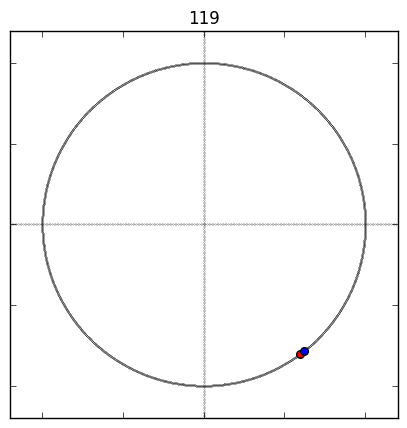

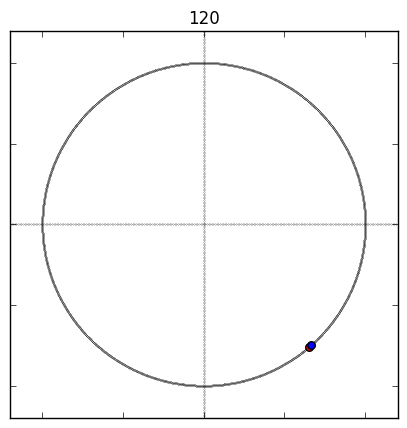

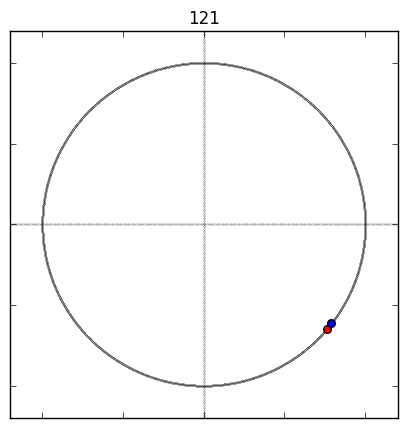

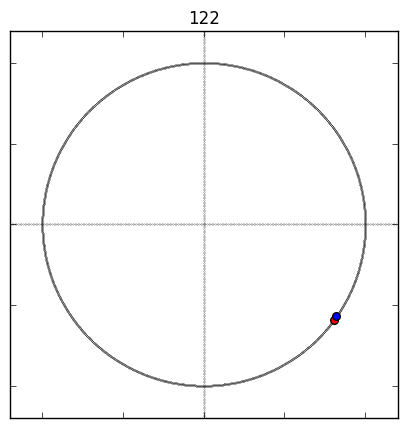

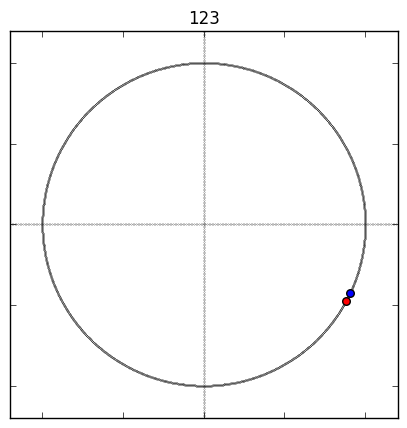

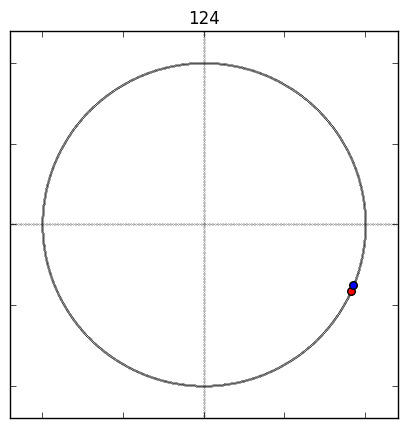

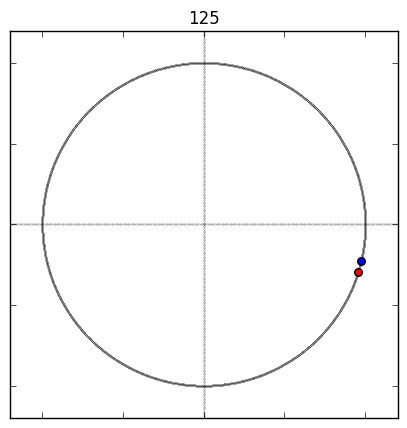

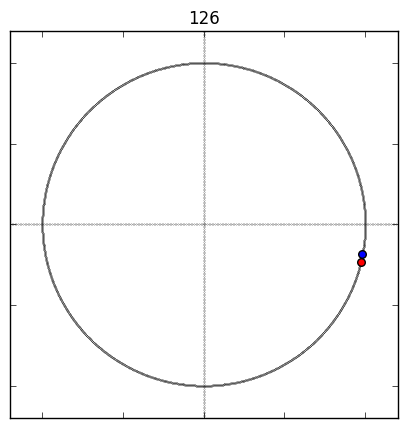

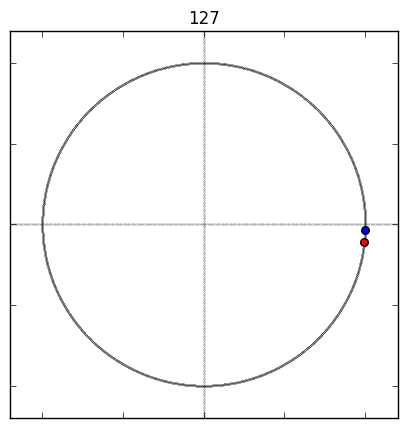

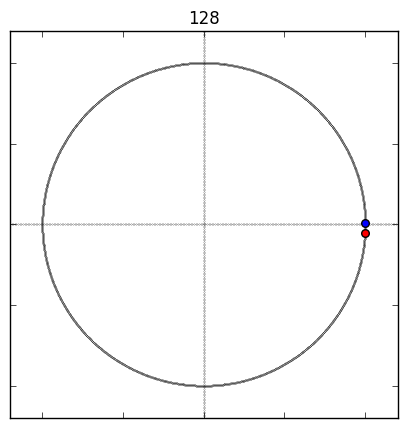

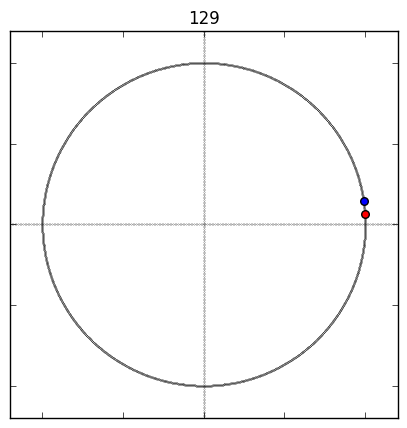

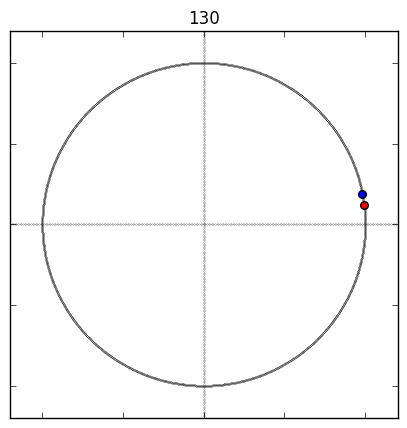

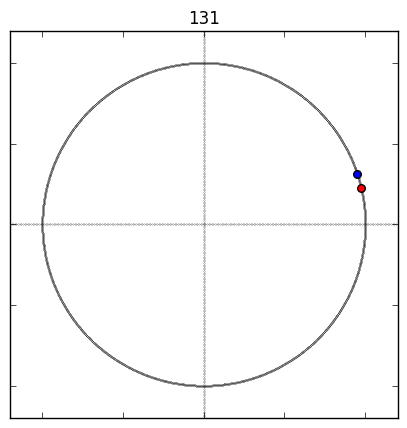

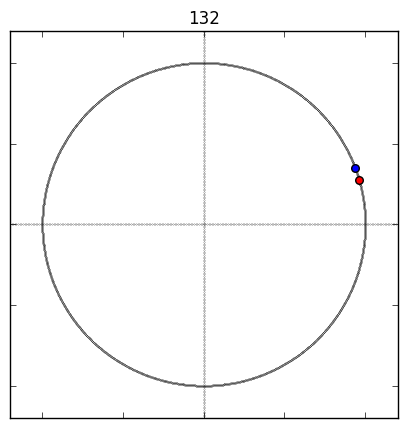

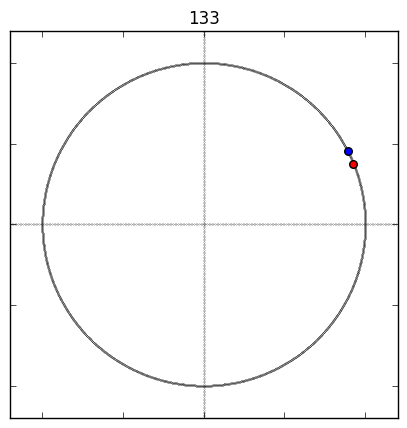

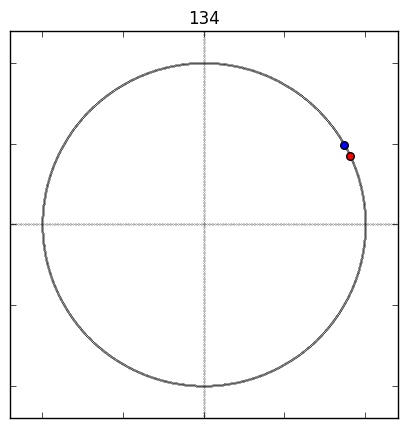

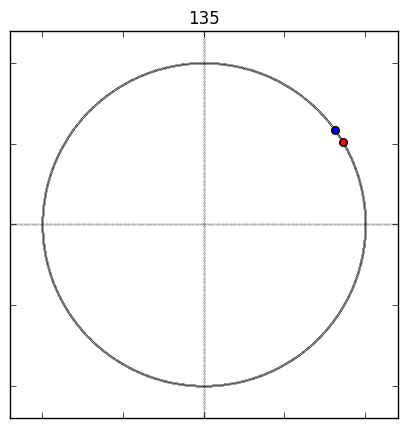

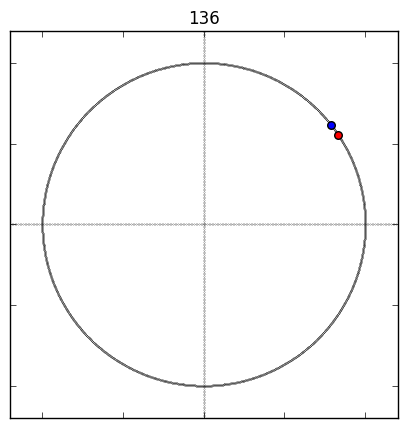

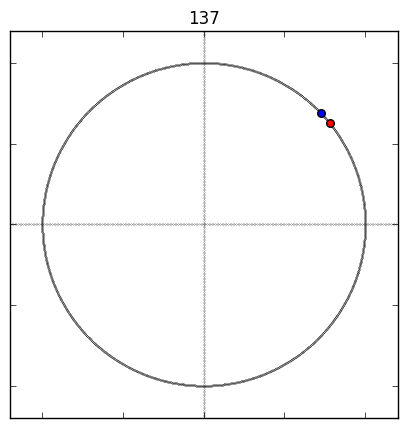

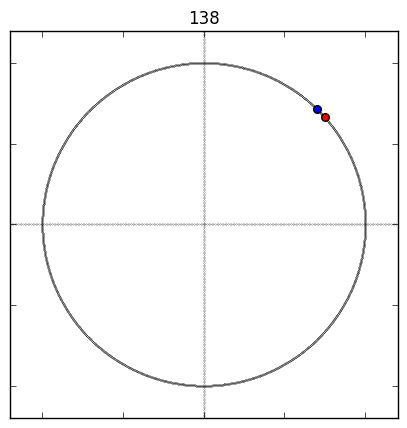

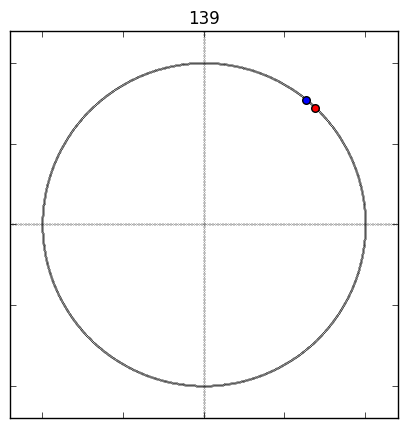

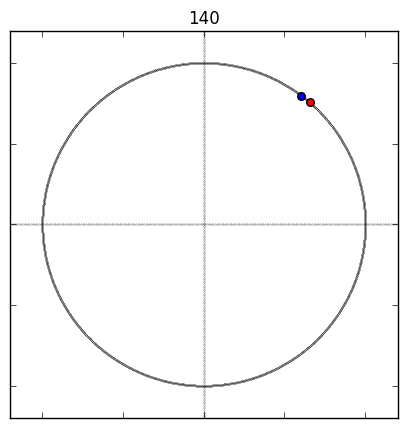

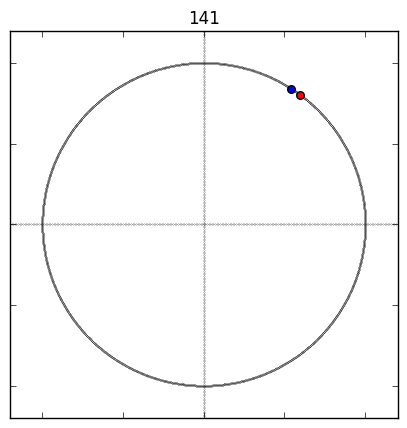

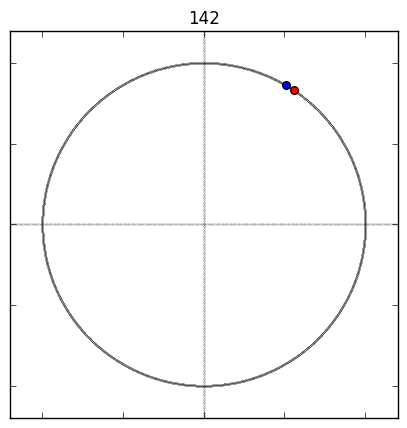

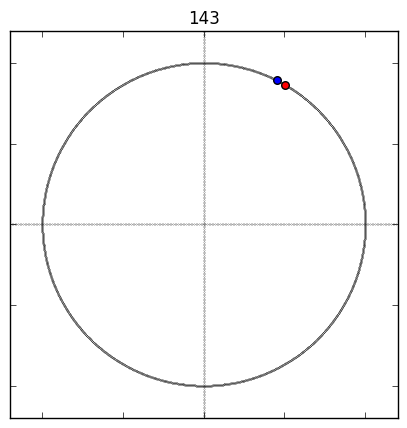

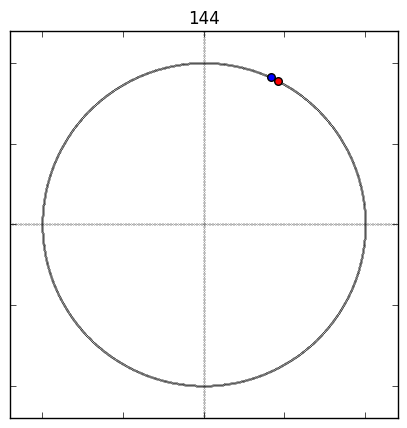

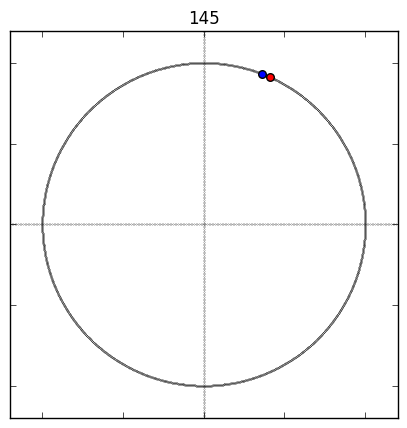

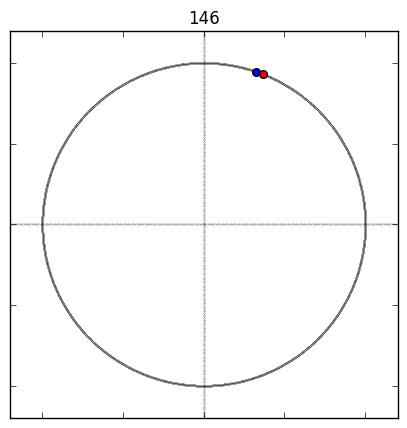

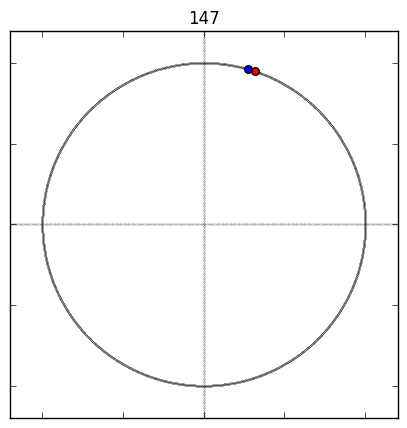

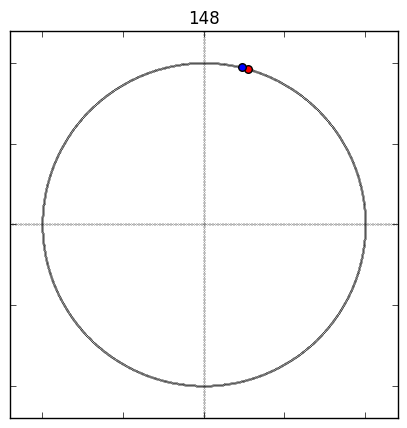

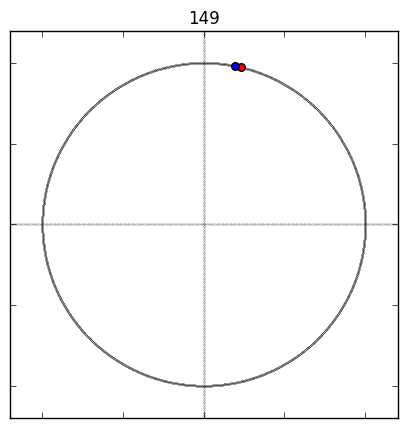

In [37]:
for f, (p1, p2) in enumerate(zip(P1, P2)):
    plt.figure(figsize=(5,5))
    plt.clf()
    plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)

    phases = np.arange(0,2*np.pi,np.pi/1024)
    plt.scatter( np.cos(phases), np.sin(phases), c='k', s=.02)

    A = np.arange(-1.2, 1.2, 0.01)
    plt.scatter( A, np.zeros_like(A), c='k', s=.02)
    plt.scatter( np.zeros_like(A), A, c='k', s=.02)

    plt.scatter( np.cos(p1), np.sin(p1), c='r', s=30)
    plt.scatter( np.cos(p2), np.sin(p2), c='b', s=30)
    
    plt.title('{0:0>3}'.format(f))

    plt.axis('equal')
    plt.axis([-1.2, 1.2, -1.2, 1.2])
    plt.savefig( os.path.join(save_dir, '{0:0>6}.png'.format(f)))
    


In [38]:
from opmap.util import makeMovie

In [39]:
makeMovie(save_dir.rstrip('/'))

ffmpeg -r 15 -y -i "/mnt/Omer/Project/01.PhaseDiscontinuity/AnalysisResults/2019-06-05/%06d.png" -vcodec rawvideo "/mnt/Omer/Project/01.PhaseDiscontinuity/AnalysisResults/2019-06-05.avi"
